In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from geopy.geocoders import Nominatim
from geopy.distance import vincenty

In [65]:
#Read in data
df = pd.read_csv("/Users/alphadiallo/Documents/Charlottesville/Parking/Data/Parking_Tickets.csv", low_memory=False)
#Convert date column to datetime
df['DateIssued'] =  pd.to_datetime(df['DateIssued'], format='%Y-%m-%d')
#Set date column as index
#df.set_index('DateIssued')

In [66]:
print(df.head())
print('\n Data Types:')
print(df.dtypes)

  TicketNumber                 Timestamp DateIssued IssuedMonth  IssuedDay  \
0         8522  2001-10-02T04:00:00.000Z 2001-10-02         Oct        2.0   
1      19015 6  2013-04-13T04:00:00.000Z 2013-04-13         Apr       13.0   
2      1902115  2013-05-25T04:00:00.000Z 2013-05-25         May       25.0   
3      3343501  2013-04-26T04:00:00.000Z 2013-04-26         Apr       26.0   
4      3343601  2013-04-26T04:00:00.000Z 2013-04-26         Apr       26.0   

  IssuedDOW  IssuedYear     StreetName   TimeIssued StreetNumber  ...   \
0       Tue      2001.0  CHANCELLOR ST         1457          100  ...    
1       Sat      2013.0    ALTAMONT ST         9:42          402  ...    
2       Sat      2013.0        PARK ST         8:03          435  ...    
3       Fri      2013.0   WATER ST LOT      0.68125          100  ...    
4       Fri      2013.0   WATER ST LOT  0.683333333          100  ...    

  AppealDate  AppealGrantedDate          ViolationDescription  AppealStatus  \
0    37

<h1>Count of violations by date issues and violation type</h1>
<i>This analysis looks at all time data (1999-2019)</i><br>

In [67]:
#Drop columns except date and count
df1 = df.drop(['TicketNumber','Timestamp','IssuedMonth','IssuedDay','IssuedDOW','IssuedYear','StreetName','TimeIssued','StreetNumber','LicenseState','WaiverRequestDate','WaiverGrantedDate','AppealDate','AppealGrantedDate','AppealStatus','Location','LicensePlateAnon','WaiverStatus', 'ViolationCost', 'ViolationLatePayCost'], axis=1)
#Sum by DateIssued
df1 = df1.set_index('DateIssued').groupby([pd.Grouper(freq='D'), 'ViolationDescription']).sum()
df1.sort_values(by=['Count'],ascending=False).head(10)

,,Count
DateIssued,ViolationDescription,
2004-02-17,No City License,364.0
2004-02-18,No City License,330.0
2003-02-25,No City License,266.0
2003-02-24,No City License,265.0
2001-03-07,No City License,261.0
2004-02-19,No City License,259.0
2000-12-13,Overtime Parking,185.0
2002-02-20,No City License,177.0
2003-02-20,No City License,175.0


<h1>The time series plot below uses date time by day, we can change this frequency above.</h1>

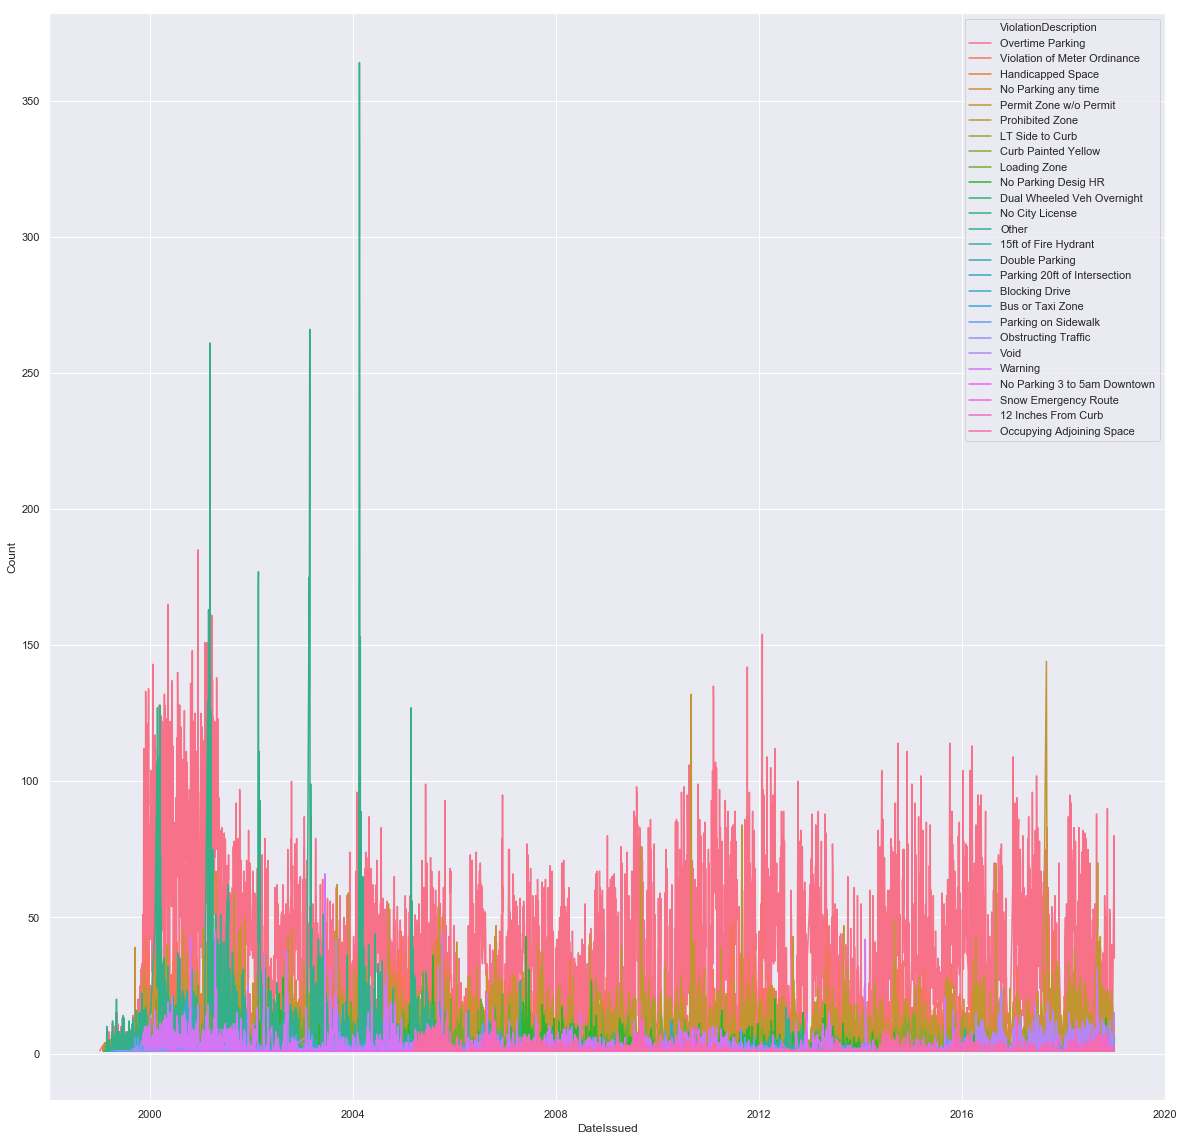

In [68]:
##df1.plot(figsize=(20,10))
df1.index.names = ['DateIssued','ViolationDescription']
sns.set(rc={'figure.figsize':(20,20)})
sns.lineplot(x = df1.index.get_level_values('DateIssued'), y = 'Count', hue = df1.index.get_level_values('ViolationDescription'), data=df1)

<b>We can take a closer look at the top violations using a bar chart. Doing this, tells us that overtime parking is the biggest contributor to parking violations in the city by a margin.</b><br>
<i>All time data</i>

In [69]:
#Drop columns except desc and count
df2 = df
df2 = df.drop(['TicketNumber','Timestamp','IssuedMonth','IssuedDay','IssuedDOW','IssuedYear','StreetName','TimeIssued','StreetNumber','LicenseState','WaiverRequestDate','WaiverGrantedDate','AppealDate','AppealGrantedDate','AppealStatus','Location','LicensePlateAnon','WaiverStatus'], axis=1)
df2 = df2.groupby('ViolationDescription').sum()
df2 = df2.sort_values(by=['Count'],ascending=False).head(30)


(array([     0.,  25000.,  50000.,  75000., 100000., 125000., 150000.,
        175000., 200000.]), <a list of 9 Text xticklabel objects>)

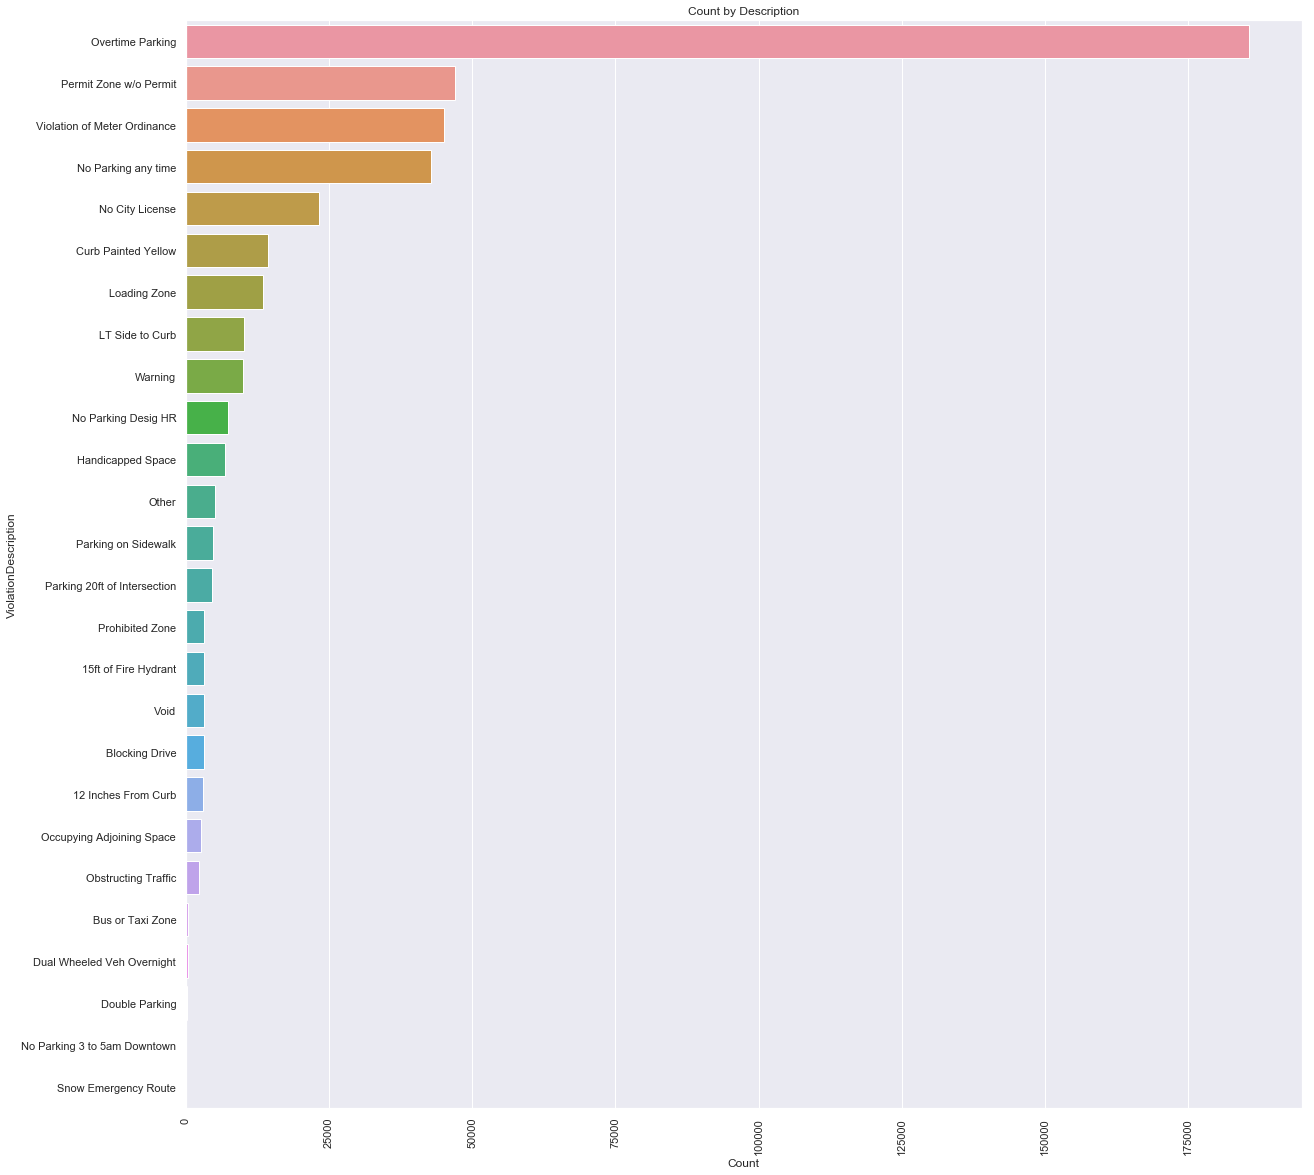

In [70]:
sns.set(rc={'figure.figsize':(20,20)})
b = sns.barplot(x = 'Count', y =  df2.index, data=df2).set_title('Count by Description')
plt.xticks(rotation=90)

<b>We can take it a bit further and look at total count by DOW to see if there is any pattern in ticketing by the City.</b><br>
<i>This will likely be better to look at across years rather then an overall count.. <br> For now we will take the top 4 parking violations in the city.</i>

In [71]:
#Drop columns except desc and count
df3 = df.drop(['TicketNumber','Timestamp','IssuedMonth','IssuedDay','IssuedYear','StreetName','TimeIssued','StreetNumber','LicenseState','WaiverRequestDate','WaiverGrantedDate','AppealDate','AppealGrantedDate','AppealStatus','Location','LicensePlateAnon','WaiverStatus','ViolationDescription', 'ViolationCost', 'ViolationLatePayCost'], axis=1)
##df3 = df3.loc[df['ViolationDescription'] == 'Overtime Parking'] #Change type of violation
df3 = df3.groupby('IssuedDOW').sum()
df3 = df3.sort_values(by=['Count'],ascending=False).head(7)
print(df3)

             Count
IssuedDOW         
Wed        89956.0
Tue        89745.0
Thu        83736.0
Fri        78021.0
Mon        73197.0
Sat        22791.0
Sun         4365.0


In [72]:
#df3.head()
#sns.barplot(x= df3.index, y= "Count", data=df3, order=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])

<b>Define DF - DOW and Month Analysis for Top Violations</b>

In [73]:
df4 = df.drop(['DateIssued','TicketNumber','Timestamp','IssuedMonth','IssuedDay','IssuedYear','StreetName','TimeIssued','StreetNumber','LicenseState','WaiverRequestDate','WaiverGrantedDate','AppealDate','AppealGrantedDate','AppealStatus','Location','LicensePlateAnon','WaiverStatus', 'ViolationCost', 'ViolationLatePayCost'], axis=1)
print(df4.dtypes)
df4 = df4.loc[df['ViolationDescription'].isin(['Overtime Parking','Permit Zone w/o Permit', 'Violation of Meter Ordinance', 'No Parking any time'])]
df4['IssuedDOW'] = df4['IssuedDOW'].astype('category')
df4['Sum'] = df4.groupby(['IssuedDOW', 'ViolationDescription'])['Count'].transform('sum')
df4.head()


IssuedDOW                object
ViolationDescription     object
Count                   float64
dtype: object


,IssuedDOW,ViolationDescription,Count,Sum
1,Sat,Permit Zone w/o Permit,1.0,1288.0
3,Fri,Violation of Meter Ordinance,1.0,8898.0
4,Fri,Violation of Meter Ordinance,1.0,8898.0
5,Fri,No Parking any time,1.0,7362.0
8,Thu,No Parking any time,1.0,7438.0


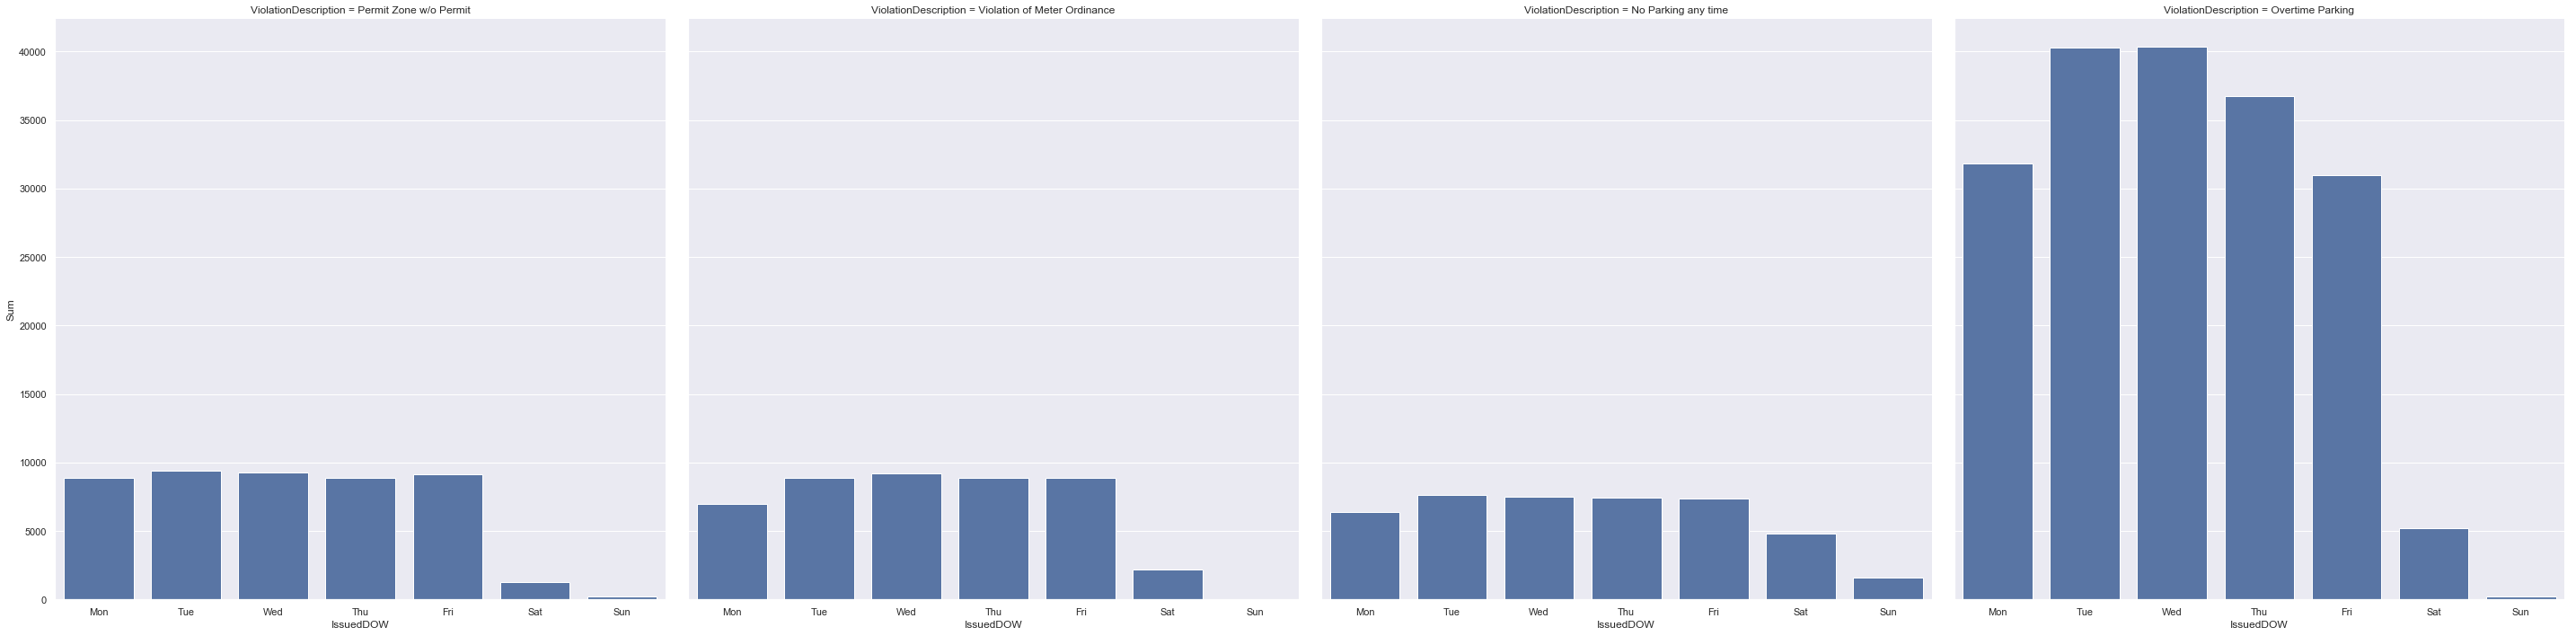

In [74]:
sns.set(rc={'figure.figsize':(30,30)})
g = sns.FacetGrid(df4, col="ViolationDescription",
                  palette="Set3", height=10)
g.map(sns.barplot, 'IssuedDOW', 'Sum', order=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])


<i>Note: Here we can talk about what we have seen so far.</i><br>
<h1>Number of Issued Parking Violations by Month 1999-2019</h1>

In [75]:
df5 = df.drop(['ViolationDescription','DateIssued','TicketNumber','Timestamp','IssuedDOW','IssuedDay','StreetName','TimeIssued','StreetNumber','LicenseState','WaiverRequestDate','WaiverGrantedDate','AppealDate','AppealGrantedDate','AppealStatus','Location','LicensePlateAnon','WaiverStatus', 'ViolationCost', 'ViolationLatePayCost'], axis=1)
print(df5.dtypes)
#df5 = df5.loc[df['ViolationDescription'].isin(['Overtime Parking','Permit Zone w/o Permit', 'Violation of Meter Ordinance', 'No Parking any time'])]

df5['IssuedMonth'] = df5['IssuedMonth'].astype('category')
df5['IssuedYear'] = df5['IssuedYear'].astype('category')
df5['Sum'] = df5.groupby(['IssuedMonth', 'IssuedYear'])['Count'].transform('sum')


IssuedMonth     object
IssuedYear     float64
Count          float64
dtype: object


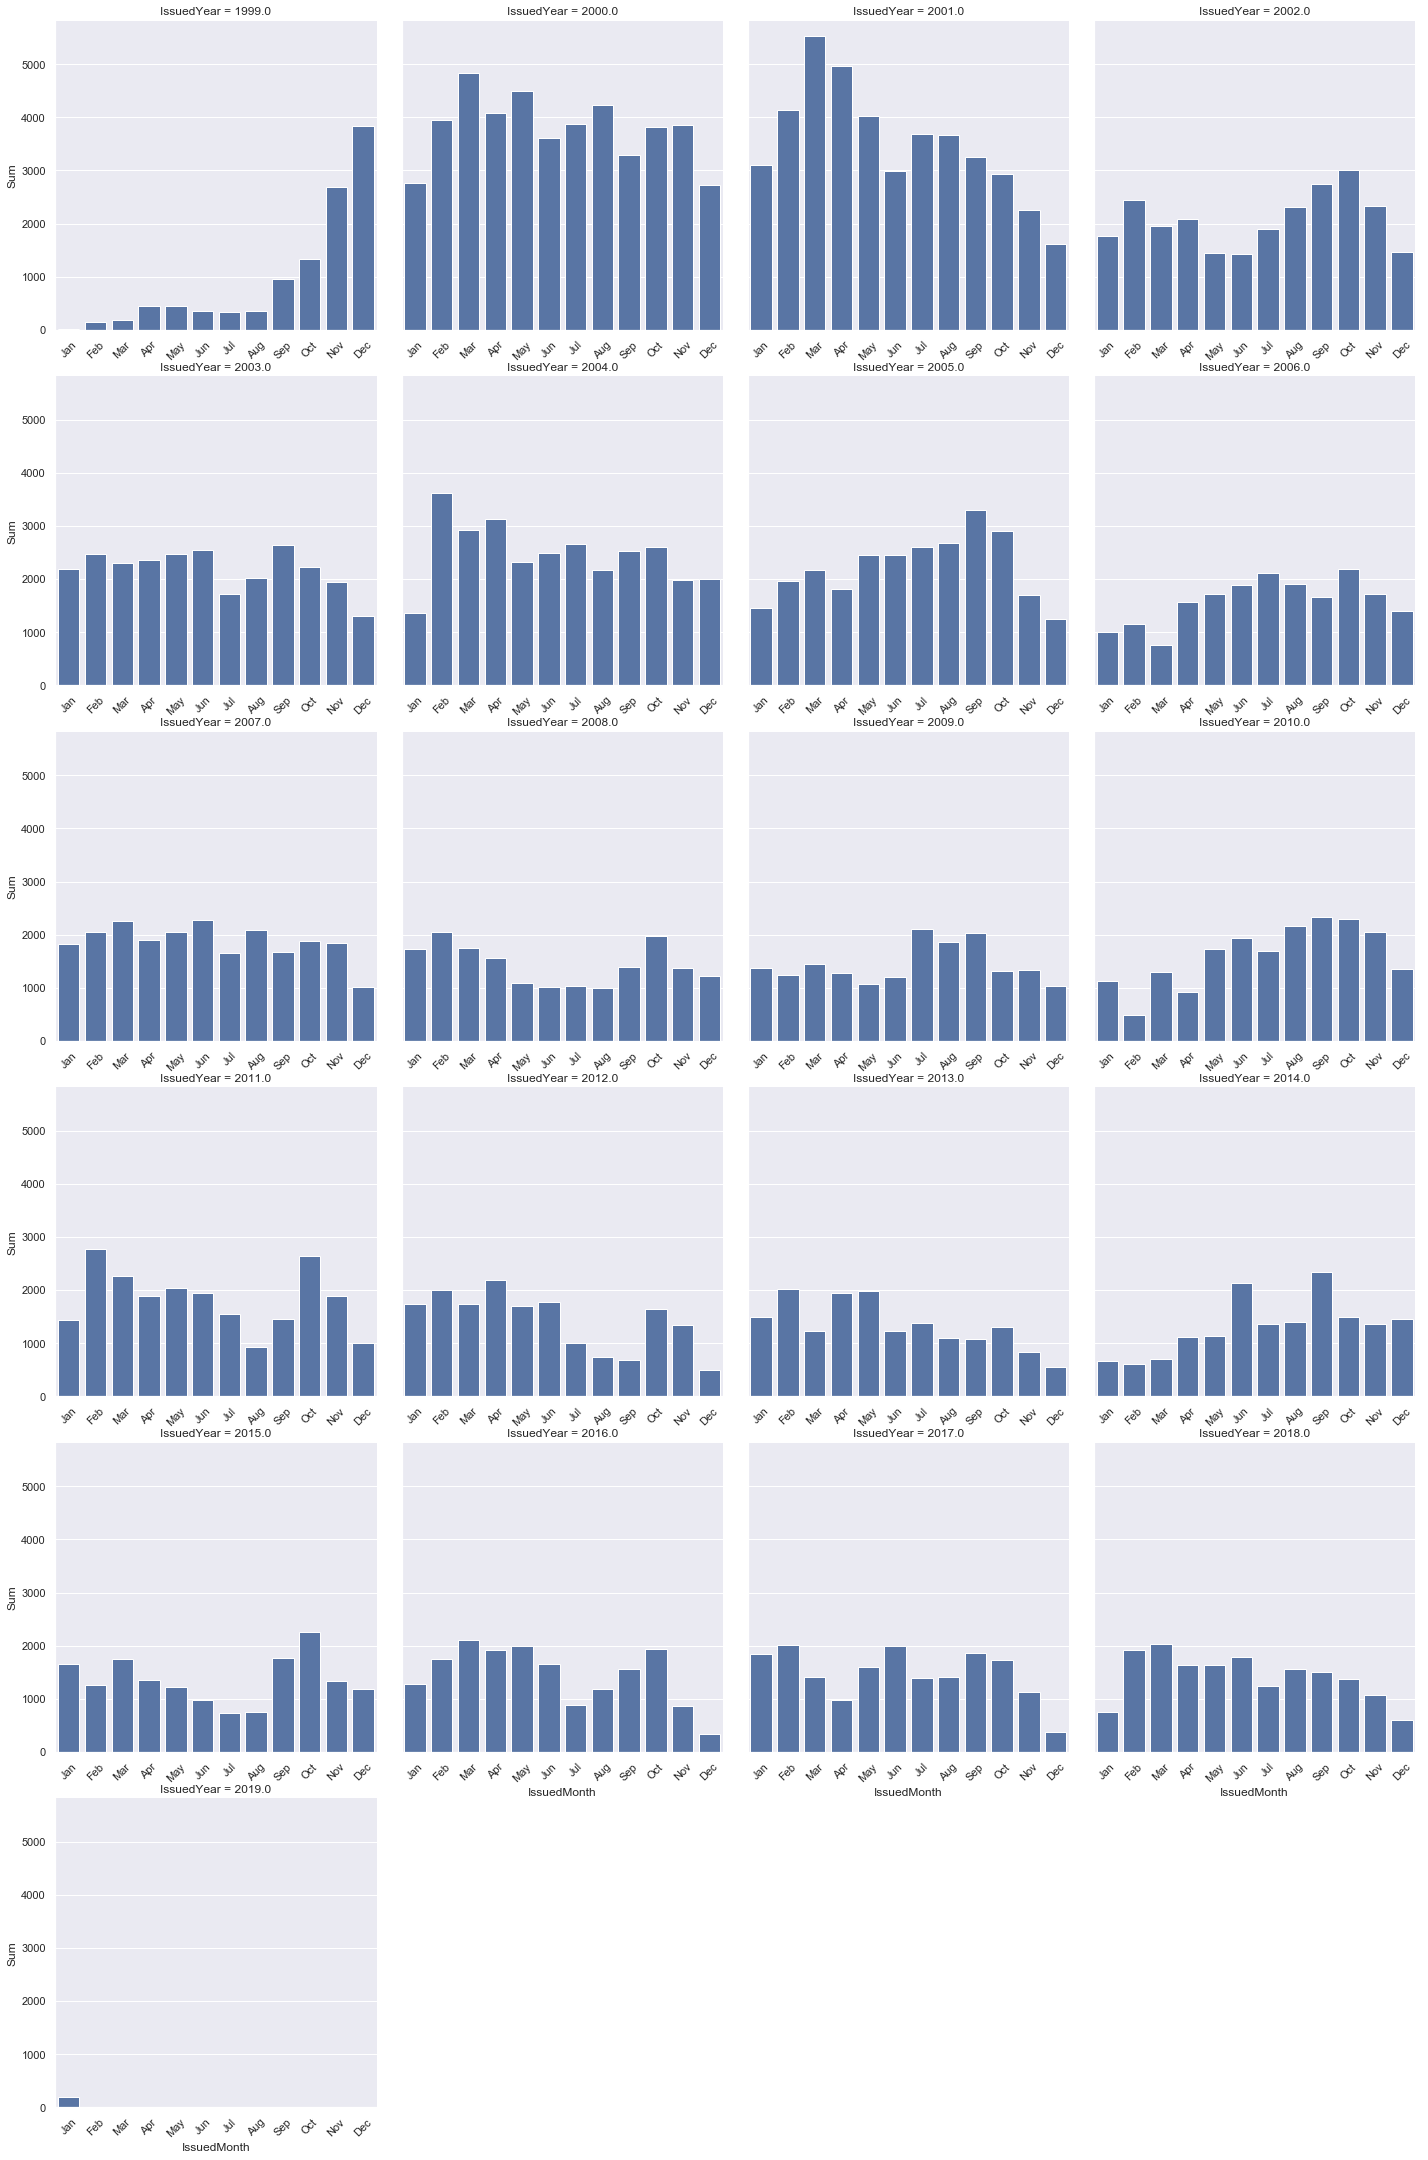

In [76]:
sns.set(rc={'figure.figsize':(30,30)})
g = sns.FacetGrid(df5, col="IssuedYear",
                  palette="Set3", col_wrap=4, height=5, sharex=False)

g.map(sns.barplot, 'IssuedMonth', 'Sum', order=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul","Aug", "Sep", "Oct", "Nov", "Dec"])
g.set_xticklabels(rotation=45)
#axes = g.axes.flatten()
#axes[0].set_title("No Parking Anytime")
#axes[1].set_title("Permit Zone No Permit")
#axes[2].set_title("Meter Violation")
#axes[3].set_title("Overtime Parking")

<b>The plot below shows parking violations by waiver status. The blue line, marked 'No Info', indicates that there has been no waiver for those parking violations. We can see at the end of 2013 that the city started to accept waivers for Overtime Parking violations by first time offenders. What's interesting is, despite this, not many drivers are utilizing the opportunity...either because they are repeat offenders or unaware of the program.</b>

Text(0.5, 1.0, 'Count by Waiver Status')

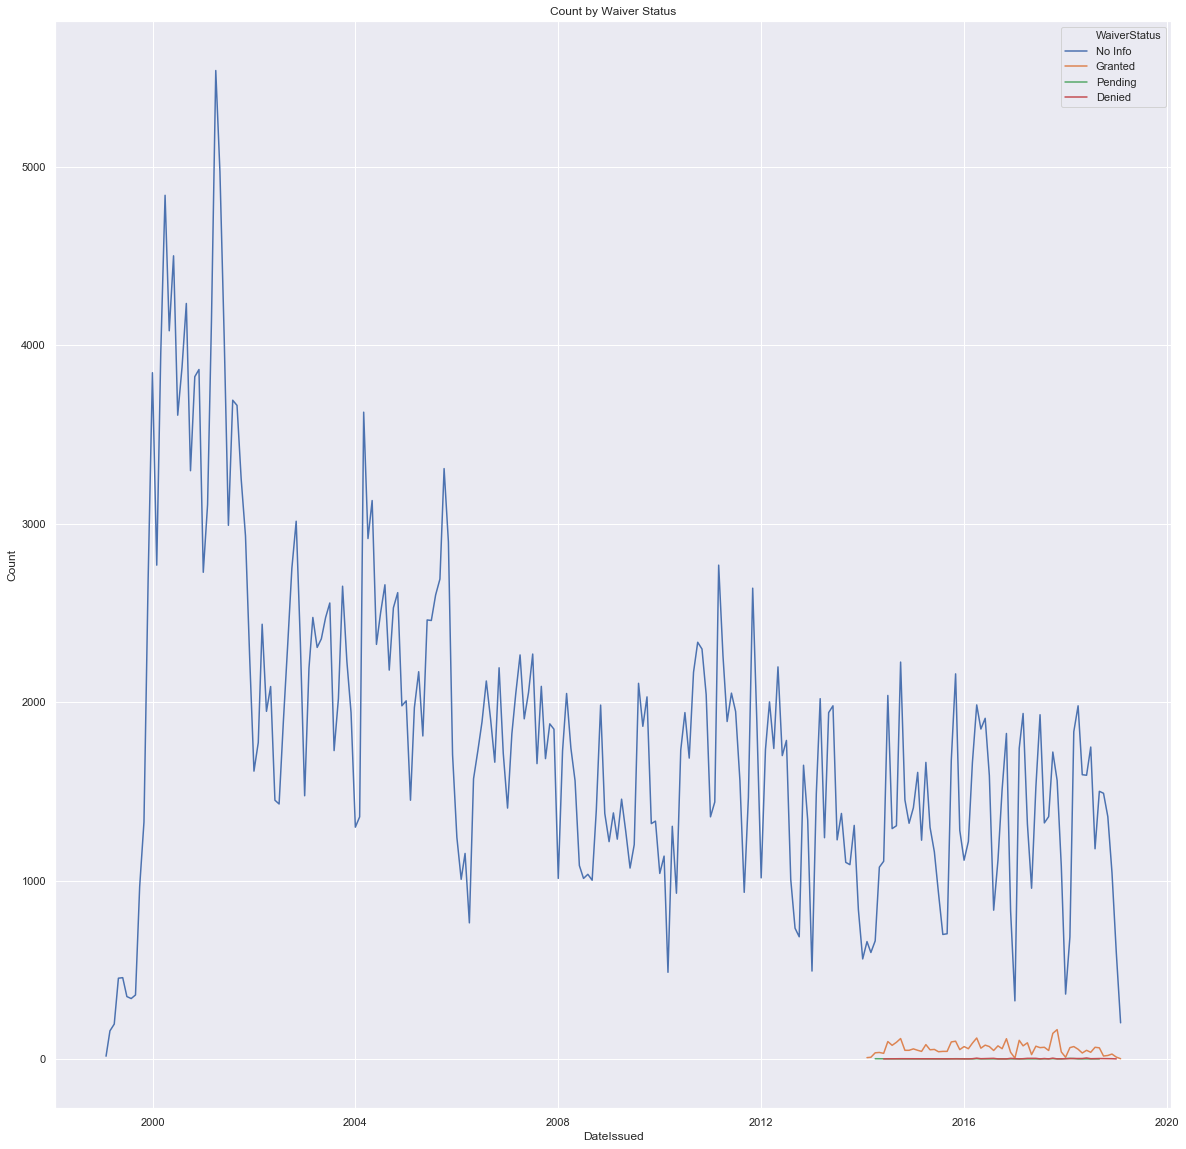

In [77]:
## Same plot as above for waived tickets

#Drop columns except date and count
df6 = df
df6 = df6.drop(['ViolationDescription', 'TicketNumber','Timestamp','IssuedMonth','IssuedDay','IssuedDOW','IssuedYear','StreetName','TimeIssued','StreetNumber','LicenseState','WaiverRequestDate','WaiverGrantedDate','AppealDate','AppealGrantedDate','AppealStatus','Location','LicensePlateAnon', 'ViolationCost', 'ViolationLatePayCost'], axis=1)
#Sum by DateIssued
df6 = df6.set_index('DateIssued').groupby([pd.Grouper(freq='M'), 'WaiverStatus']).sum()
df6.sort_values(by=['Count'],ascending=False).head(10)

##df1.plot(figsize=(20,10))
df6.index.names = ['DateIssued','WaiverStatus']

sns.set(rc={'figure.figsize':(20,20)})
sns.lineplot(x = df6.index.get_level_values('DateIssued'), y = 'Count', hue = df6.index.get_level_values('WaiverStatus'), data=df6).set_title('Count by Waiver Status')

<b>Next we can look at estimated cost.. since we don't have historical data for this we can look at what the numbers have been for the last few years..2016, 2017, 2018, and 2019..This data is available in the city's municipal code.</b>

Text(0.5, 1.0, 'Cost by Violation')

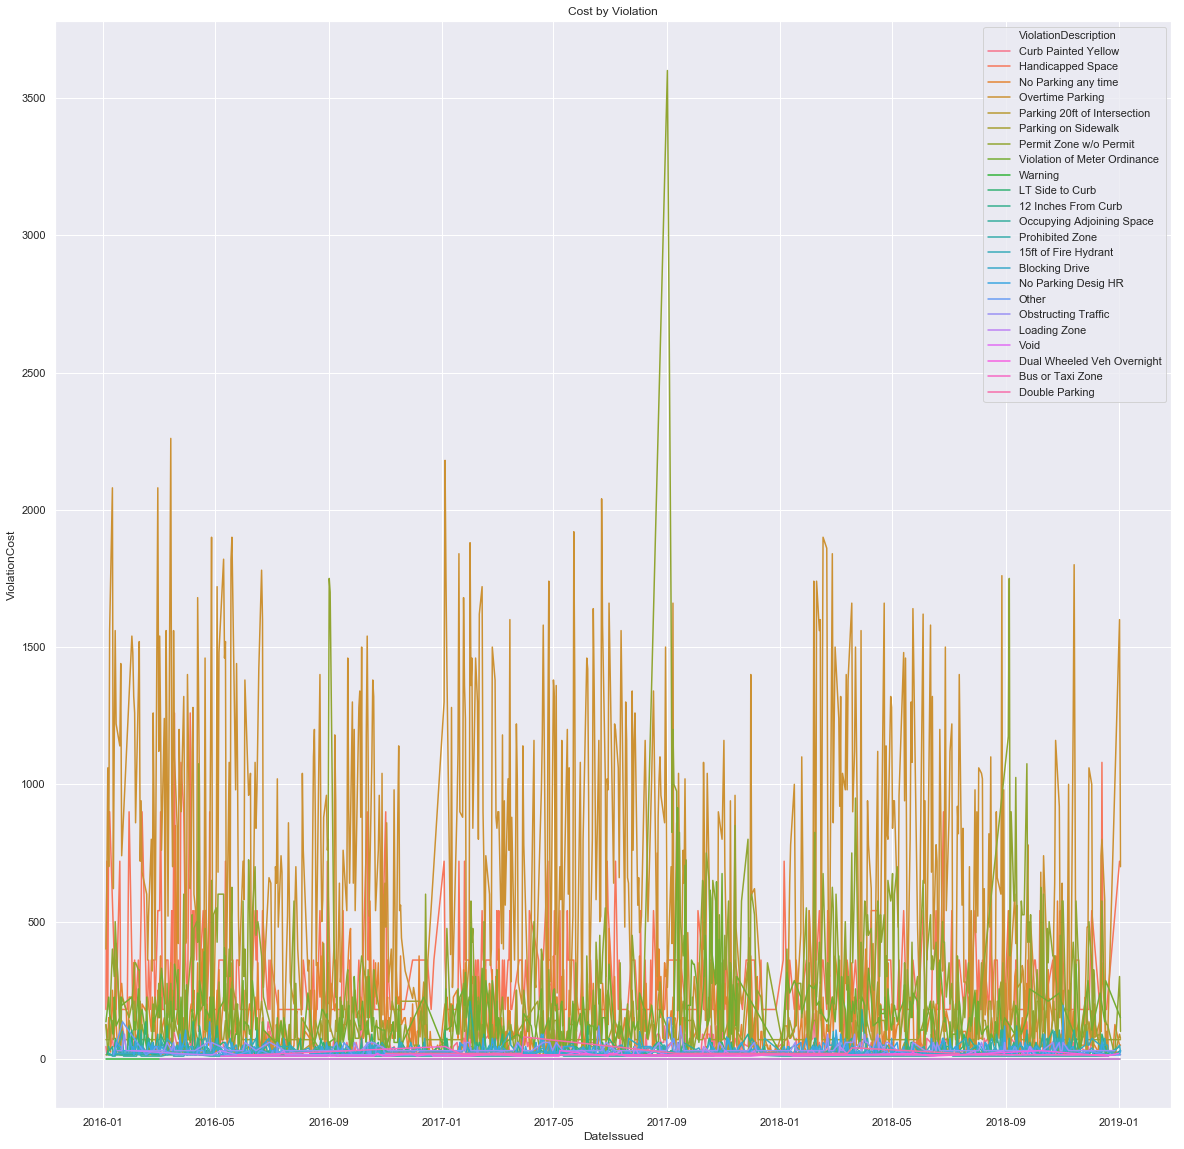

In [78]:
## Same plot as above for waived tickets

#Drop columns except date and count
df7 = df
df5 = df7.loc[df['WaiverStatus'].isin(['No Info', 'Pending', 'Denied'])]
df7 = df7.drop(['TicketNumber','Timestamp','IssuedMonth','IssuedDay','IssuedDOW','IssuedYear','StreetName','TimeIssued','StreetNumber','LicenseState','WaiverRequestDate','WaiverGrantedDate','AppealDate','AppealGrantedDate','AppealStatus','Location','LicensePlateAnon', 'Count', 'ViolationLatePayCost'], axis=1)
df7 = df7.loc[df['IssuedYear'].isin(['2016', '2017', '2018', '2019'])]
#Sum by DateIssued
df7 = df7.set_index('DateIssued').groupby([pd.Grouper(freq='d'), 'ViolationDescription']).sum()
df7.sort_values(by=['ViolationCost'],ascending=False).head(10)


##df1.plot(figsize=(20,10))
df7.index.names = ['DateIssued','ViolationDescription']

sns.set(rc={'figure.figsize':(20,20)})
sns.lineplot(x = df7.index.get_level_values('DateIssued'), y = 'ViolationCost', hue = df7.index.get_level_values('ViolationDescription'), data=df7).set_title('Cost by Violation')


<h1>Estimated Total Revenue 2016-2019</h1>

We will look at the est. total revenue by top violations. These are Overtime Parking, Permit Zone w/o Permit, Violation of Meter Ordinance, No Parking any time.<br>

TicketNumber                    object
Timestamp                       object
DateIssued              datetime64[ns]
IssuedMonth                     object
IssuedDay                      float64
IssuedDOW                       object
IssuedYear                     float64
StreetName                      object
TimeIssued                      object
StreetNumber                    object
LicenseState                    object
WaiverRequestDate              float64
WaiverGrantedDate              float64
AppealDate                     float64
AppealGrantedDate              float64
ViolationDescription            object
AppealStatus                    object
Location                        object
LicensePlateAnon               float64
WaiverStatus                    object
ViolationLatePayCost           float64
ViolationCost                  float64
Count                          float64
dtype: object


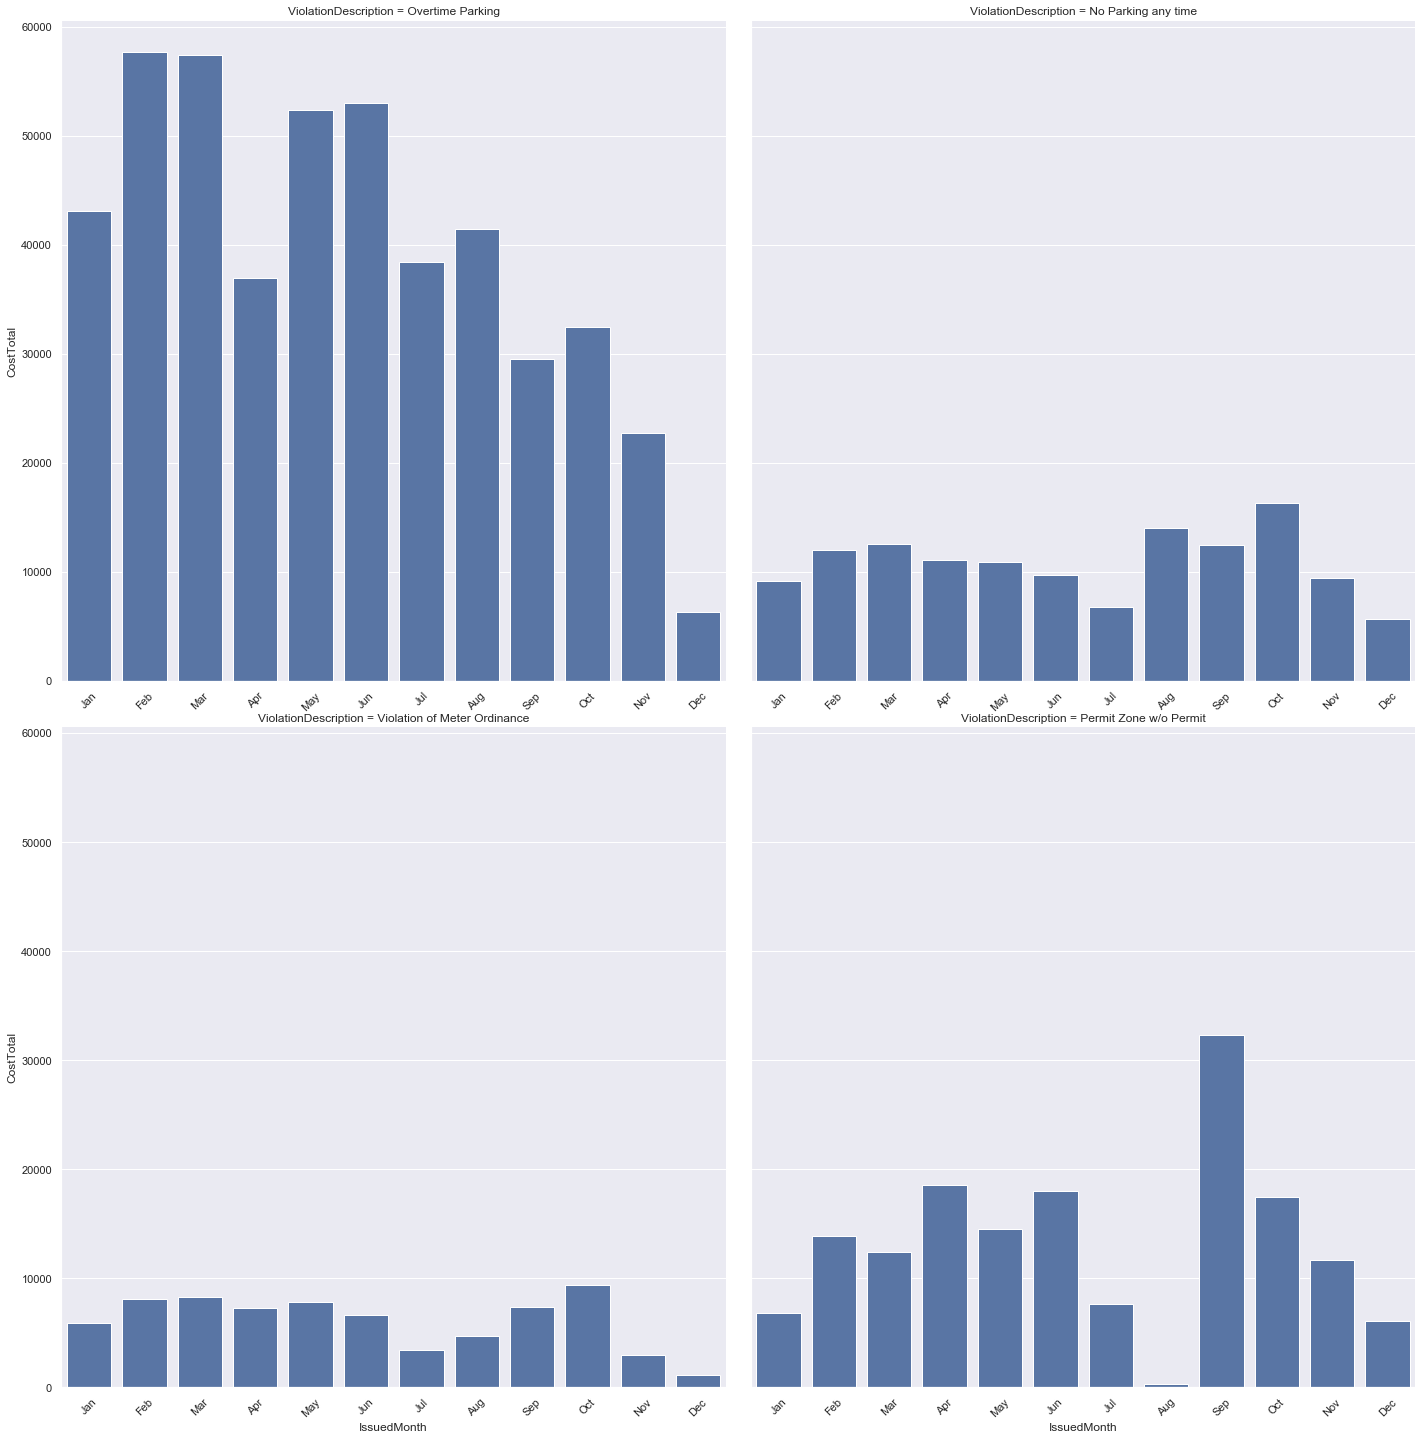

In [79]:
df8 = df.drop(['DateIssued','TicketNumber','Timestamp','IssuedDOW','IssuedDay','IssuedYear','StreetName','TimeIssued','StreetNumber','LicenseState','WaiverRequestDate','WaiverGrantedDate','AppealDate','AppealGrantedDate','AppealStatus','Location','LicensePlateAnon','WaiverStatus', 'ViolationLatePayCost'], axis=1)
print(df5.dtypes)
df8 = df8.loc[df['ViolationDescription'].isin(['Overtime Parking','Permit Zone w/o Permit', 'Violation of Meter Ordinance', 'No Parking any time'])]
df8 = df8.loc[df['IssuedYear'].isin(['2016', '2017', '2018', '2019'])]
df8['IssuedMonth'] = df8['IssuedMonth'].astype('category')
df8['CostTotal'] = df8.groupby(['IssuedMonth', 'ViolationDescription'])['ViolationCost'].transform('sum')

sns.set(rc={'figure.figsize':(30,30)})
g = sns.FacetGrid(df8, col="ViolationDescription", col_wrap=2, sharex=False,
                  palette="Set3", height=10)
g.map(sns.barplot, 'IssuedMonth', 'CostTotal', order=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul","Aug", "Sep", "Oct", "Nov", "Dec"])
g.set_xticklabels(rotation=45)



In [83]:
## Same plot as above for waived tickets

#Drop columns except date and count
#df9 = df
#df9 = df9.loc[df['WaiverStatus'].isin(['No Info', 'Pending', 'Denied'])]
#df9 = df9.loc[df['IssuedYear'].isin(['2016', '2017', '2018', '2019'])]
#df9 = df9.drop(['ViolationDescription','TicketNumber','Timestamp','IssuedMonth','IssuedDay','IssuedDOW','IssuedYear','StreetName','TimeIssued','StreetNumber','LicenseState','WaiverRequestDate','WaiverGrantedDate','AppealDate','AppealGrantedDate','AppealStatus','Location','LicensePlateAnon', 'Count', 'ViolationLatePayCost'], axis=1)
#Sum by DateIssued
#df9 = df9.set_index('DateIssued').groupby([pd.Grouper(freq='M')]).sum()
#df9.sort_values(by=['ViolationCost'],ascending=False).head(10)

##df1.plot(figsize=(20,10))
#df9.index.names = ['DateIssued']

#sns.set(rc={'figure.figsize':(20,10)})
#sns.lineplot(x = df9.index.get_level_values('DateIssued'), y = 'ViolationCost', data=df9).set_title('Cost by Time')

<h1>Distribution of Violation Amounts by Month 1999-2017</h1>

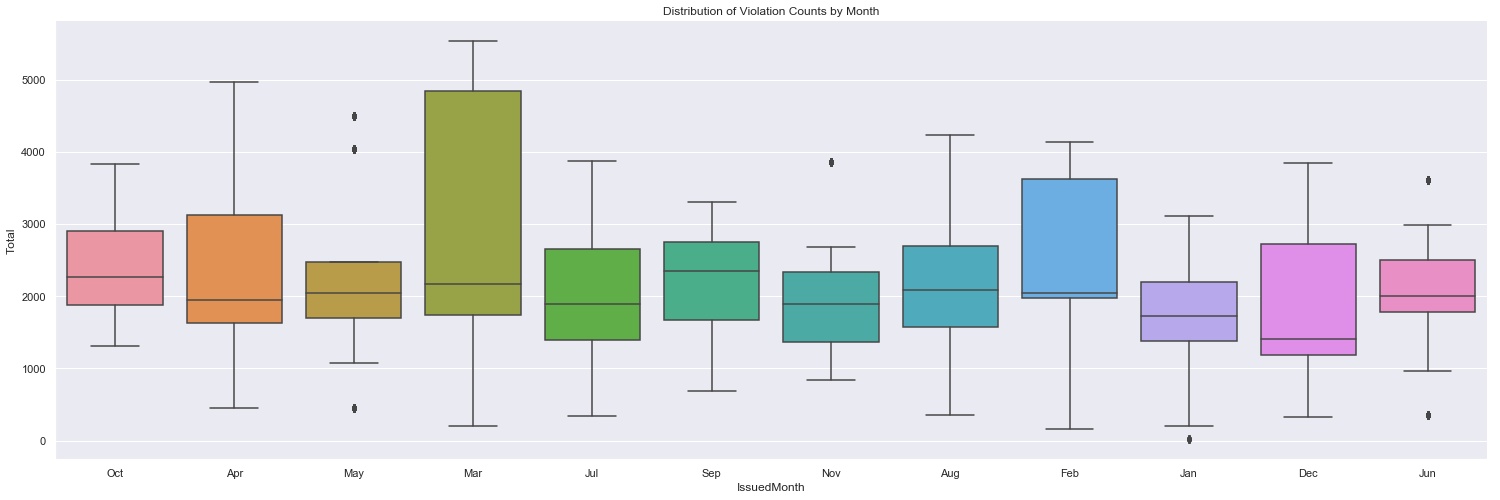

In [85]:
df10 = df
df['Total'] = df.groupby(['IssuedYear', 'IssuedMonth'])['Count'].transform('sum')
df10.head()

sns.set(rc={'figure.figsize':(20,20)})
sns.catplot(x="IssuedMonth", y="Total", kind="box", height=7, aspect=3, data=df10)
plt.title("Distribution of Violation Counts by Month", y=1.013);

In [86]:
df11 = df
df11 = df11.drop(['TotalCost','DateIssued', 'WaiverStatus','ViolationDescription','TicketNumber','Timestamp','IssuedMonth','IssuedDay','IssuedDOW','IssuedYear','TimeIssued','StreetNumber','LicenseState','WaiverRequestDate','WaiverGrantedDate','AppealDate','AppealGrantedDate','AppealStatus','Location','LicensePlateAnon', 'ViolationLatePayCost'], axis=1)
df11['Sum'] = df11.groupby(['StreetName'])['Count'].transform('sum')
df11['ViolationCost'] = df11.groupby(['StreetName'])['ViolationCost'].transform('sum')
df11 = df11.sort_values(by=['Sum'],ascending=False)
df11 = df11.drop_duplicates(subset=['StreetName'], keep='last')
df11 = df11.drop(['Count'], axis = 1)
df11 = df11.sort_values(by=['Sum'],ascending=False).head(30)
print(df11)



                StreetName  ViolationCost   Total      Sum
167328        WATER ST LOT       561195.0  1700.0  38002.0
139179      UNIVERSITY AVE       337300.0  1456.0  16556.0
54660       JEFFERSON ST E       329130.0  2555.0  15725.0
274486       UNIVERSITY AV       250055.0  3691.0  13217.0
342768      E JEFFERSON ST       281695.0  1686.0  10814.0
259363         MARKET ST E       194770.0  5538.0   9686.0
286104           MAIN ST W       157370.0  3249.0   9014.0
42232           GARRETT ST       160675.0  1506.0   8897.0
263939           4TH ST NE       251335.0  4970.0   8746.0
356110          13TH ST NW       166440.0  2649.0   8730.0
28856   JEFFERSON PARK AVE       165735.0  1122.0   8253.0
164254           7TH ST NE       153190.0  1979.0   7688.0
351340           3RD ST NE       154395.0  2335.0   7531.0
113399         E MARKET ST       263520.0  2260.0   7257.0
171791         BRANDON AVE       121635.0  1979.0   6535.0
428054            1ST ST N       186485.0  2354.0   6350